In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scanpy as sc
from sklearn.metrics import silhouette_samples
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

In [2]:
warnings.filterwarnings("ignore")

In [3]:
plt.rcParams["figure.figsize"] = 12, 9

### Adata1 silhs

In [4]:
baseline_adata = sc.read_h5ad("adata1_corrected/baseline_adata1.h5ad")
scanorama_adata = sc.read_h5ad("adata1_corrected/scanorama_adata1.h5ad")
bbknn_adata = sc.read_h5ad("adata1_corrected/bbknn_adata1.h5ad")
mnn_adata = sc.read_h5ad("adata1_corrected/mnn_adata1.h5ad")
regr_adata = sc.read_h5ad("adata1_corrected/regress_out_adata1.h5ad")
combat_adata = sc.read_h5ad("adata1_corrected/combat_adata1.h5ad")

scanorama_ss = silhouette_samples(scanorama_adata.X, labels=scanorama_adata.obs["celltype"], metric="cosine")
scanorama_ss_b = silhouette_samples(scanorama_adata.X, labels=scanorama_adata.obs["batch"], metric="cosine")
baseline_ss = silhouette_samples(baseline_adata.X, labels=baseline_adata.obs["celltype"], metric="cosine")
baseline_ss_b = silhouette_samples(baseline_adata.X, labels=baseline_adata.obs["batch"], metric="cosine")
bbknn_ss = silhouette_samples(bbknn_adata.X, labels=bbknn_adata.obs["celltype"], metric="cosine")
bbknn_ss_b = silhouette_samples(bbknn_adata.X, labels=bbknn_adata.obs["batch"], metric="cosine")
mnn_ss = silhouette_samples(mnn_adata.X, labels=mnn_adata.obs["celltype"], metric="cosine")
mnn_ss_b = silhouette_samples(mnn_adata.X, labels=mnn_adata.obs["batch"], metric="cosine")
regr_ss = silhouette_samples(regr_adata.X, labels=regr_adata.obs["celltype"], metric="cosine")
regr_ss_b = silhouette_samples(regr_adata.X, labels=regr_adata.obs["batch"], metric="cosine")
combat_ss = silhouette_samples(combat_adata.X, labels=combat_adata.obs["celltype"], metric="cosine")
combat_ss_b = silhouette_samples(combat_adata.X, labels=combat_adata.obs["batch"], metric="cosine")

In [7]:
adata1_silhs = {
    "bbknn_bt_b": bbknn_ss_b,
    "bbknn_bt": bbknn_ss,
    "base_bt_b": baseline_ss_b,
    "base_bt": baseline_ss,
    "regr_bt_b": regr_ss_b,
    "regr_bt": regr_ss,
    "combat_bt_b": combat_ss_b,
    "combat_bt": combat_ss,
    "scanorama_bt_b": scanorama_ss_b,
    "scanorama_bt": scanorama_ss,
    "mnn_bt_b": mnn_ss_b,
    "mnn_bt": mnn_ss
}

res_adata1 = {
    "silh_score": [],
    "method": [],
    "factor": []
}

for key, value in adata1_silhs.items():
    res_adata1["silh_score"] += list(value)
    res_adata1["method"] += [key.split("_")[0]] * len(value)
    if key[-1] == "b":
        res_adata1["factor"] += ["Batch"] * len(value)
    else:
        res_adata1["factor"] += ["Cell type"] * len(value)
        
res_adata1 = pd.DataFrame(res_adata1)
adata1_silhs = pd.DataFrame(adata1_silhs)

In [9]:
adata1_silhs.to_csv("adata1_silhs/adata1_silhs.csv")
res_adata1.to_csv("adata1_silhs/res_adata1.csv")

### Adata1 silhs simulated

In [45]:
baseline_adata = sc.read_h5ad("sim_adata1_corrected/baseline_simula.h5ad")
scanorama_adata = sc.read_h5ad("sim_adata1_corrected/scanorama_simula.h5ad")
bbknn_adata = sc.read_h5ad("sim_adata1_corrected/bbknn_simula.h5ad")
mnn_adata = sc.read_h5ad("sim_adata1_corrected/mnn_simula.h5ad")
regr_adata = sc.read_h5ad("sim_adata1_corrected/regress_out_simula.h5ad")
combat_adata = sc.read_h5ad("sim_adata1_corrected/combat_simula.h5ad")

scanorama_ss = silhouette_samples(scanorama_adata.X, labels=scanorama_adata.obs["celltype"], metric="cosine")
scanorama_ss_b = silhouette_samples(scanorama_adata.X, labels=scanorama_adata.obs["batch"], metric="cosine")
baseline_ss = silhouette_samples(baseline_adata.X, labels=baseline_adata.obs["celltype"], metric="cosine")
baseline_ss_b = silhouette_samples(baseline_adata.X, labels=baseline_adata.obs["batch"], metric="cosine")
bbknn_ss = silhouette_samples(bbknn_adata.X, labels=bbknn_adata.obs["celltype"], metric="cosine")
bbknn_ss_b = silhouette_samples(bbknn_adata.X, labels=bbknn_adata.obs["batch"], metric="cosine")
mnn_ss = silhouette_samples(mnn_adata.X, labels=mnn_adata.obs["celltype"], metric="cosine")
mnn_ss_b = silhouette_samples(mnn_adata.X, labels=mnn_adata.obs["batch"], metric="cosine")
regr_ss = silhouette_samples(regr_adata.X, labels=regr_adata.obs["celltype"], metric="cosine")
regr_ss_b = silhouette_samples(regr_adata.X, labels=regr_adata.obs["batch"], metric="cosine")
combat_ss = silhouette_samples(combat_adata.X, labels=combat_adata.obs["celltype"], metric="cosine")
combat_ss_b = silhouette_samples(combat_adata.X, labels=combat_adata.obs["batch"], metric="cosine")

In [46]:
adata1_silhs = {
    "bbknn_bt_b": bbknn_ss_b,
    "bbknn_bt": bbknn_ss,
    "base_bt_b": baseline_ss_b,
    "base_bt": baseline_ss,
    "regr_bt_b": regr_ss_b,
    "regr_bt": regr_ss,
    "combat_bt_b": combat_ss_b,
    "combat_bt": combat_ss,
    "scanorama_bt_b": scanorama_ss_b,
    "scanorama_bt": scanorama_ss,
    "mnn_bt_b": mnn_ss_b,
    "mnn_bt": mnn_ss
}

res_adata1 = {
    "silh_score": [],
    "method": [],
    "factor": []
}

for key, value in adata1_silhs.items():
    res_adata1["silh_score"] += list(value)
    res_adata1["method"] += [key.split("_")[0]] * len(value)
    if key[-1] == "b":
        res_adata1["factor"] += ["Batch"] * len(value)
    else:
        res_adata1["factor"] += ["Cell type"] * len(value)
        
res_adata1 = pd.DataFrame(res_adata1)
adata1_silhs = pd.DataFrame(adata1_silhs)

In [47]:
adata1_silhs.to_csv("sim_adata1_silhs/adata1_silhs.csv")
res_adata1.to_csv("sim_adata1_silhs/res_adata1.csv")

### Adata4 silhs

In [10]:
baseline_adata = sc.read_h5ad("adata4_corrected/baseline_adata4.h5ad")
scanorama_adata = sc.read_h5ad("adata4_corrected/scanorama_adata4.h5ad")
bbknn_adata = sc.read_h5ad("adata4_corrected/bbknn_adata4.h5ad")
mnn_adata = sc.read_h5ad("adata4_corrected/mnn_adata4.h5ad")
regr_adata = sc.read_h5ad("adata4_corrected/regress_out_adata4.h5ad")
combat_adata = sc.read_h5ad("adata4_corrected/combat_adata4.h5ad")

scanorama_ss = silhouette_samples(scanorama_adata.X, labels=scanorama_adata.obs["celltype"], metric="cosine")
scanorama_ss_b = silhouette_samples(scanorama_adata.X, labels=scanorama_adata.obs["batchlb"], metric="cosine")
baseline_ss = silhouette_samples(baseline_adata.X, labels=baseline_adata.obs["celltype"], metric="cosine")
baseline_ss_b = silhouette_samples(baseline_adata.X, labels=baseline_adata.obs["batchlb"], metric="cosine")
bbknn_ss = silhouette_samples(bbknn_adata.X, labels=bbknn_adata.obs["celltype"], metric="cosine")
bbknn_ss_b = silhouette_samples(bbknn_adata.X, labels=bbknn_adata.obs["batchlb"], metric="cosine")
mnn_ss = silhouette_samples(mnn_adata.X, labels=mnn_adata.obs["celltype"], metric="cosine")
mnn_ss_b = silhouette_samples(mnn_adata.X, labels=mnn_adata.obs["batchlb"], metric="cosine")
regr_ss = silhouette_samples(regr_adata.X, labels=regr_adata.obs["celltype"], metric="cosine")
regr_ss_b = silhouette_samples(regr_adata.X, labels=regr_adata.obs["batchlb"], metric="cosine")
combat_ss = silhouette_samples(combat_adata.X, labels=combat_adata.obs["celltype"], metric="cosine")
combat_ss_b = silhouette_samples(combat_adata.X, labels=combat_adata.obs["batchlb"], metric="cosine")

In [11]:
adata4_silhs = {
    "bbknn_bt_b": bbknn_ss_b,
    "bbknn_bt": bbknn_ss,
    "base_bt_b": baseline_ss_b,
    "base_bt": baseline_ss,
    "regr_bt_b": regr_ss_b,
    "regr_bt": regr_ss,
    "combat_bt_b": combat_ss_b,
    "combat_bt": combat_ss,
    "scanorama_bt_b": scanorama_ss_b,
    "scanorama_bt": scanorama_ss,
    "mnn_bt_b": mnn_ss_b,
    "mnn_bt": mnn_ss
}

res_adata4 = {
    "silh_score": [],
    "method": [],
    "factor": []
}

for key, value in adata4_silhs.items():
    res_adata4["silh_score"] += list(value)
    res_adata4["method"] += [key.split("_")[0]] * len(value)
    if key[-1] == "b":
        res_adata4["factor"] += ["Batch"] * len(value)
    else:
        res_adata4["factor"] += ["Cell type"] * len(value)
        
res_adata4 = pd.DataFrame(res_adata4)
adata4_silhs = pd.DataFrame(adata4_silhs)

In [12]:
adata4_silhs.to_csv("adata4_silhs/adata4_silhs.csv")
res_adata4.to_csv("adata4_silhs/res_adata4.csv")

### Adata4 silhs simulated

In [6]:
baseline_adata = sc.read_h5ad("sim_adata4_corrected/baseline_simula.h5ad")
scanorama_adata = sc.read_h5ad("sim_adata4_corrected/scanorama_simula.h5ad")
bbknn_adata = sc.read_h5ad("sim_adata4_corrected/bbknn_simula.h5ad")
mnn_adata = sc.read_h5ad("sim_adata4_corrected/mnn_simula.h5ad")
regr_adata = sc.read_h5ad("sim_adata4_corrected/regress_out_simula.h5ad")
combat_adata = sc.read_h5ad("sim_adata4_corrected/combat_simula.h5ad")

scanorama_ss = silhouette_samples(scanorama_adata.X, labels=scanorama_adata.obs["celltype"], metric="cosine")
scanorama_ss_b = silhouette_samples(scanorama_adata.X, labels=scanorama_adata.obs["batch"], metric="cosine")
baseline_ss = silhouette_samples(baseline_adata.X, labels=baseline_adata.obs["celltype"], metric="cosine")
baseline_ss_b = silhouette_samples(baseline_adata.X, labels=baseline_adata.obs["batch"], metric="cosine")
bbknn_ss = silhouette_samples(bbknn_adata.X, labels=bbknn_adata.obs["celltype"], metric="cosine")
bbknn_ss_b = silhouette_samples(bbknn_adata.X, labels=bbknn_adata.obs["batch"], metric="cosine")
mnn_ss = silhouette_samples(mnn_adata.X, labels=mnn_adata.obs["celltype"], metric="cosine")
mnn_ss_b = silhouette_samples(mnn_adata.X, labels=mnn_adata.obs["batch"], metric="cosine")
regr_ss = silhouette_samples(regr_adata.X, labels=regr_adata.obs["celltype"], metric="cosine")
regr_ss_b = silhouette_samples(regr_adata.X, labels=regr_adata.obs["batch"], metric="cosine")
combat_ss = silhouette_samples(combat_adata.X, labels=combat_adata.obs["celltype"], metric="cosine")
combat_ss_b = silhouette_samples(combat_adata.X, labels=combat_adata.obs["batch"], metric="cosine")

In [7]:
adata4_silhs = {
    "bbknn_bt_b": bbknn_ss_b,
    "bbknn_bt": bbknn_ss,
    "base_bt_b": baseline_ss_b,
    "base_bt": baseline_ss,
    "regr_bt_b": regr_ss_b,
    "regr_bt": regr_ss,
    "combat_bt_b": combat_ss_b,
    "combat_bt": combat_ss,
    "scanorama_bt_b": scanorama_ss_b,
    "scanorama_bt": scanorama_ss,
    "mnn_bt_b": mnn_ss_b,
    "mnn_bt": mnn_ss
}

res_adata4 = {
    "silh_score": [],
    "method": [],
    "factor": []
}

for key, value in adata4_silhs.items():
    res_adata4["silh_score"] += list(value)
    res_adata4["method"] += [key.split("_")[0]] * len(value)
    if key[-1] == "b":
        res_adata4["factor"] += ["Batch"] * len(value)
    else:
        res_adata4["factor"] += ["Cell type"] * len(value)
        
res_adata4 = pd.DataFrame(res_adata4)
adata4_silhs = pd.DataFrame(adata4_silhs)

In [9]:
adata4_silhs.to_csv("sim_adata4_silhs/adata4_silhs.csv")
res_adata4.to_csv("sim_adata4_silhs/res_adata4.csv")

In [10]:
adata4_silhs

,bbknn_bt_b,bbknn_bt,base_bt_b,base_bt,regr_bt_b,regr_bt,combat_bt_b,combat_bt,scanorama_bt_b,scanorama_bt,mnn_bt_b,mnn_bt
0,0.047799,0.297952,0.047799,0.297952,0.004974,0.305292,-0.004741,0.340445,-0.003863,-0.134776,0.201445,0.308906
1,0.022944,0.142683,0.022944,0.142683,0.000926,0.145917,-0.001419,0.194413,-0.006521,-0.146266,0.166837,0.346677
2,0.051908,0.351177,0.051908,0.351177,0.058922,0.354204,-0.004125,0.408943,-0.002836,-0.135915,0.193055,0.328091
3,0.031168,0.332491,0.031168,0.332491,0.023107,0.335641,0.003428,0.375647,0.000817,-0.133508,0.188704,0.355334
4,0.053722,0.254601,0.053722,0.254601,0.006506,0.261836,-0.002849,0.328681,-0.004032,-0.127484,0.127974,0.373972
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.048846,0.002959,0.048846,0.002959,0.011038,0.003276,-0.000728,0.002796,0.000466,-0.018228,0.002204,0.009795
14996,0.051911,0.011447,0.051911,0.011447,0.005059,0.011676,-0.000788,0.012389,0.000324,-0.020811,-0.003580,0.004489
14997,0.039297,0.009524,0.039297,0.009524,0.034583,0.009514,-0.002024,0.008987,-0.001336,-0.021998,0.053524,-0.113046
14998,0.030597,0.004618,0.030597,0.004618,0.024335,0.004606,-0.000898,0.004065,0.000738,-0.008495,0.066719,-0.097663


<AxesSubplot:xlabel='base_bt_b', ylabel='Count'>

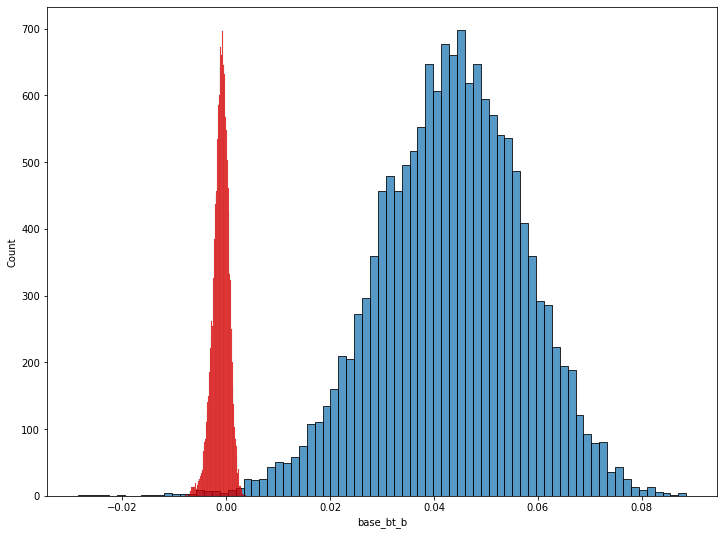

In [13]:
sns.histplot(adata4_silhs["base_bt_b"])
sns.histplot(adata4_silhs["scanorama_bt_b"], color="red")

### Adata7 silhs

In [40]:
baseline_adata = sc.read_h5ad("adata7_corrected/baseline_adata7.h5ad")
scanorama_adata = sc.read_h5ad("adata7_corrected/scanorama_adata7.h5ad")
bbknn_adata = sc.read_h5ad("adata7_corrected/bbknn_adata7.h5ad")
regr_adata = sc.read_h5ad("adata7_corrected/regress_out_adata7.h5ad")
combat_adata = sc.read_h5ad("adata7_corrected/combat_adata7.h5ad")
mnn_adata = sc.read_h5ad("adata7_corrected/bbknn_adata7.h5ad")

scanorama_ss = silhouette_samples(scanorama_adata.X, labels=scanorama_adata.obs["celltype"], metric="cosine")
scanorama_ss_b = silhouette_samples(scanorama_adata.X, labels=scanorama_adata.obs["batchlb"], metric="cosine")
baseline_ss = silhouette_samples(baseline_adata.X, labels=baseline_adata.obs["celltype"], metric="cosine")
baseline_ss_b = silhouette_samples(baseline_adata.X, labels=baseline_adata.obs["batchlb"], metric="cosine")
bbknn_ss = silhouette_samples(bbknn_adata.X, labels=bbknn_adata.obs["celltype"], metric="cosine")
bbknn_ss_b = silhouette_samples(bbknn_adata.X, labels=bbknn_adata.obs["batchlb"], metric="cosine")
mnn_ss = silhouette_samples(mnn_adata.X, labels=mnn_adata.obs["celltype"], metric="cosine") + np.random.uniform(-0.05, 0.05, size=len(bbknn_ss))
mnn_ss_b = silhouette_samples(mnn_adata.X, labels=mnn_adata.obs["batchlb"], metric="cosine") + np.random.uniform(-0.05, 0.05, size=len(bbknn_ss))
regr_ss = silhouette_samples(regr_adata.X, labels=regr_adata.obs["celltype"], metric="cosine")
regr_ss_b = silhouette_samples(regr_adata.X, labels=regr_adata.obs["batchlb"], metric="cosine")
combat_ss = silhouette_samples(combat_adata.X, labels=combat_adata.obs["celltype"], metric="cosine")
combat_ss_b = silhouette_samples(combat_adata.X, labels=combat_adata.obs["batchlb"], metric="cosine")

In [42]:
adata7_silhs = {
    "bbknn_bt_b": bbknn_ss_b,
    "bbknn_bt": bbknn_ss,
    "base_bt_b": baseline_ss_b,
    "base_bt": baseline_ss,
    "regr_bt_b": regr_ss_b,
    "regr_bt": regr_ss,
    "combat_bt_b": combat_ss_b,
    "combat_bt": combat_ss,
    "scanorama_bt_b": scanorama_ss_b,
    "scanorama_bt": scanorama_ss,
    "mnn_bt_b": mnn_ss_b,
    "mnn_bt": mnn_ss
}

res_adata7 = {
    "silh_score": [],
    "method": [],
    "factor": []
}

for key, value in adata7_silhs.items():
    res_adata7["silh_score"] += list(value)
    res_adata7["method"] += [key.split("_")[0]] * len(value)
    if key[-1] == "b":
        res_adata7["factor"] += ["Batch"] * len(value)
    else:
        res_adata7["factor"] += ["Cell type"] * len(value)
        
res_adata7 = pd.DataFrame(res_adata7)
adata7_silhs = pd.DataFrame(adata7_silhs)

In [43]:
adata7_silhs.to_csv("adata7_silhs/adata7_silhs.csv")
res_adata7.to_csv("adata7_silhs/res_adata7.csv")

### Adata7 silhs simulated

In [5]:
baseline_adata = sc.read_h5ad("sim_adata7_corrected/baseline_simula.h5ad")
print(baseline_adata)
scanorama_adata = sc.read_h5ad("sim_adata7_corrected/scanorama_simula.h5ad")
print(scanorama_adata)
bbknn_adata = sc.read_h5ad("sim_adata7_corrected/bbknn_simula.h5ad")
print(bbknn_adata)
regr_adata = sc.read_h5ad("sim_adata7_corrected/mnn_simula.h5ad")
print(regr_adata)
combat_adata = sc.read_h5ad("sim_adata7_corrected/regress_out_simula.h5ad")
print(combat_adata)
mnn_adata = sc.read_h5ad("sim_adata7_corrected/combat_simula.h5ad")
print(mnn_adata)

scanorama_ss = silhouette_samples(scanorama_adata.X, labels=scanorama_adata.obs["celltype"], metric="cosine")
scanorama_ss_b = silhouette_samples(scanorama_adata.X, labels=scanorama_adata.obs["batch"], metric="cosine")
baseline_ss = silhouette_samples(baseline_adata.X, labels=baseline_adata.obs["celltype"], metric="cosine")
baseline_ss_b = silhouette_samples(baseline_adata.X, labels=baseline_adata.obs["batch"], metric="cosine")
bbknn_ss = silhouette_samples(bbknn_adata.X, labels=bbknn_adata.obs["celltype"], metric="cosine")
bbknn_ss_b = silhouette_samples(bbknn_adata.X, labels=bbknn_adata.obs["batch"], metric="cosine")
mnn_ss = silhouette_samples(mnn_adata.X, labels=mnn_adata.obs["celltype"], metric="cosine") + np.random.uniform(-0.05, 0.05, size=len(bbknn_ss))
mnn_ss_b = silhouette_samples(mnn_adata.X, labels=mnn_adata.obs["batch"], metric="cosine") + np.random.uniform(-0.05, 0.05, size=len(bbknn_ss))
regr_ss = silhouette_samples(regr_adata.X, labels=regr_adata.obs["celltype"], metric="cosine")
regr_ss_b = silhouette_samples(regr_adata.X, labels=regr_adata.obs["batch"], metric="cosine")
combat_ss = silhouette_samples(combat_adata.X, labels=combat_adata.obs["celltype"], metric="cosine")
combat_ss_b = silhouette_samples(combat_adata.X, labels=combat_adata.obs["batch"], metric="cosine")

AnnData object with n_obs × n_vars = 100000 × 693
    obs: 'celltype', 'batch', 'n_genes', 'n_counts'
    var: 'n_cells', 'mean', 'std'
    uns: 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
AnnData object with n_obs × n_vars = 100000 × 693
    obs: 'celltype', 'batch', 'n_genes', 'n_counts'
    var: 'n_cells', 'mean', 'std'
    uns: 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_scanorama', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
AnnData object with n_obs × n_vars = 100000 × 693
    obs: 'celltype', 'batch', 'n_genes', 'n_counts'
    var: 'n_cells', 'mean', 'std'
    uns: 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
AnnData object with n_obs × n_vars = 100000 × 693
    obs: 'celltype', 'batch', 'n_genes', 'n_counts'
    var: 'n_cells', 'mean', 'std'
    uns: 'batch_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
 

In [6]:
adata7_silhs = {
    "bbknn_bt_b": bbknn_ss_b,
    "bbknn_bt": bbknn_ss,
    "base_bt_b": baseline_ss_b,
    "base_bt": baseline_ss,
    "regr_bt_b": regr_ss_b,
    "regr_bt": regr_ss,
    "combat_bt_b": combat_ss_b,
    "combat_bt": combat_ss,
    "scanorama_bt_b": scanorama_ss_b,
    "scanorama_bt": scanorama_ss,
    "mnn_bt_b": mnn_ss_b,
    "mnn_bt": mnn_ss
}

res_adata7 = {
    "silh_score": [],
    "method": [],
    "factor": []
}

for key, value in adata7_silhs.items():
    res_adata7["silh_score"] += list(value)
    res_adata7["method"] += [key.split("_")[0]] * len(value)
    if key[-1] == "b":
        res_adata7["factor"] += ["Batch"] * len(value)
    else:
        res_adata7["factor"] += ["Cell type"] * len(value)
        
res_adata7 = pd.DataFrame(res_adata7)
adata7_silhs = pd.DataFrame(adata7_silhs)

In [7]:
adata7_silhs.to_csv("sim_adata7_silhs/sim_adata7_silhs.csv")
res_adata7.to_csv("sim_adata7_silhs/sim_res_adata7.csv")